## Step 0: WELCOME TO COLAB

What You’ll Learn Today:

How to compute mean, variance, and standard deviation with Python

How to check your hand calculations using Python

How to see if 2/3 of data lie within 1 standard deviation, and 95% within 2 standard deviations

How to think about data spread with your stock returns

# Step 1: Import Libraries

In [ ]:
import pandas as pd  # for data handling
import numpy as np   # for numerical operations

#Step 2: Load Your Stock Return Data from Drive

1) Click this link: https://drive.google.com/drive/folders/1Oz_bF_O6F4gYCvf2VriHWCfuYyNgRiuJ?usp=drive_link

2) Find the file you need inside the folder.
It’s in your “Shared with me” section on Google Drive.

3) Add it to YOUR Drive:

Click the 3 dots next to the file name (More options)

Click “Organize”

Click “Add shortcut to Drive”

Pick a folder you’ll remember (create new dataset file if needed)

---> This step is important — you can’t load files directly from “Shared with me”!
It must be in your “My Drive”.

4) Mount Google Drive in Colab:
In your notebook, run:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


5) Find the File Path
Open the sidebar on the left:

Click the folder icon

Click through: drive/My Drive/... until you find your file

Right-click the file → Copy Path

In [ ]:
file_path = '/content/drive/MyDrive/QM717-2025/9 July Meeting/Masco  review session.xlsx'  # Replace with your path!
returns_df = pd.read_excel(file_path)
returns_df.head()


,PERMNO,date,RET,vwretd,sprtrn
0,34032,2004-01-30,-0.021525,0.023042,0.017276
1,34032,2004-02-27,0.051763,0.015443,0.012209
2,34032,2004-03-31,0.085592,-0.010662,-0.016359
3,34032,2004-04-30,-0.074573,-0.024222,-0.016791
4,34032,2004-05-28,0.033559,0.014068,0.012083


#Step 3: Compute Mean, Variance & Standard Deviation

👉 The Mean:
The mean is the average return for your stock. It answers the basic question: On average, what do you expect to gain or lose each period?
It’s important because it tells you the center of your data — but by itself, it doesn’t tell you how risky the stock is.

👉 The Variance:
Variance shows how much the returns deviate (spread out) from the mean, on average. It does this by squaring the deviations from the mean and averaging them.
A bigger variance means your returns swing more wildly — which means higher risk.

👉 The Standard Deviation:
Standard deviation is just the square root of the variance.
It’s in the same units as your returns (e.g., % return), so it’s easier to interpret:

✅ It tells you how far, on average, your returns are from the mean.

✅ It’s the key measure for risk and volatility.

✅ Investors, analysts, and portfolio managers use it every day to measure and compare risk.

In [ ]:
# Replace 'RET' with your actual returns column name
returns = returns_df['RET']

mean = returns.mean()
variance = returns.var()
std_dev = returns.std()

print(f"Mean: {mean:.4f}")
print(f"Variance: {variance:.6f}")
print(f"Standard Deviation: {std_dev:.4f}")


Mean: 0.0113
Variance: 0.010227
Standard Deviation: 0.1011


In [ ]:
dev = returns - mean
dev

,RET
0,-0.032786
1,0.040502
2,0.074331
3,-0.085834
4,0.022298
...,...
235,-0.034086
236,-0.105482
237,-0.036705
238,0.156621


In [ ]:
avedev=np.mean(dev)
avedev

np.float64(-3.23815048849004e-18)

In [ ]:
sqdev = (returns - mean)**2
sqdev

,RET
0,0.001075
1,0.001640
2,0.005525
3,0.007368
4,0.000497
...,...
235,0.001162
236,0.011127
237,0.001347
238,0.024530


In [ ]:
ssdev=np.sum(sqdev)
masstdev=(ssdev/240)**.5
masstdev

np.float64(0.10091663148241878)

In [ ]:
np.std(returns)

0.10091663148241874

In [ ]:
returns_df.head(6)

,PERMNO,date,RET,vwretd,sprtrn
0,34032,2004-01-30,-0.021525,0.023042,0.017276
1,34032,2004-02-27,0.051763,0.015443,0.012209
2,34032,2004-03-31,0.085592,-0.010662,-0.016359
3,34032,2004-04-30,-0.074573,-0.024222,-0.016791
4,34032,2004-05-28,0.033559,0.014068,0.012083
5,34032,2004-06-30,0.077029,0.021611,0.017989


##DIY #1: Compare with Your Hand Calculation

1️⃣ Do the same calculation by hand in Excel (Deviation from mean, squared deviation, variance, standard deviation).

2️⃣ Check if your hand results match these Python results.

#Step 4: See How Data is Spread Around the Mean

The spread around the mean shows how your returns cluster around the average.

✅ Why is this important?

If most returns are close to the mean → low risk, stable.

If returns are far from the mean → high risk, more unpredictable.

✅ 1 Standard Deviation:
In a normal distribution, about 68% (roughly 2/3) of data should fall within ±1 SD from the mean.

✅ 2 Standard Deviations:
About 95% of data should fall within ±2 SDs.

✅ Why use it?

This “rule of thumb” helps you see if your data is roughly normal.

Helps investors know what return range they’re likely to experience most of the time.

It’s used in risk management, quality control, and portfolio planning.

In [ ]:
# 1 standard deviation range
lower_1sd = mean - std_dev
upper_1sd = mean + std_dev

# 2 standard deviation range
lower_2sd = mean - 2*std_dev
upper_2sd = mean + 2*std_dev

# Fractions within ranges
within_1sd = ((returns >= lower_1sd) & (returns <= upper_1sd)).mean()
within_2sd = ((returns >= lower_2sd) & (returns <= upper_2sd)).mean()

print(f"Fraction within 1 SD: {within_1sd:.2%}")
print(f"Fraction within 2 SD: {within_2sd:.2%}")


Fraction within 1 SD: 75.00%
Fraction within 2 SD: 96.25%


## DIY #2: Interpret

Does about 2/3 of your returns fall within 1 SD?

Does about 95% fall within 2 SDs?

Does your stock follow the rule of thumb?

#Step 5: BONUS - Use Built-in Describe()

What Does describe() Do?

describe() is a built-in Pandas function that gives you quick summary statistics all in one place.

It shows:

count: Number of observations.

mean: The average.

std: Standard deviation.

min/max: The smallest and largest values.

25% / 50% / 75%: Percentiles (Quartiles) — these show how your data is distributed.

✅ It’s a great quick check to see if your hand calculations make sense!

In [ ]:
# Quick summary stats
returns.describe()

,RET
count,240.000000
mean,0.011261
std,0.101128
min,-0.421126
25%,-0.049538
50%,0.012949
75%,0.062587
max,0.461900


#Step 6: Visualize Your Data with a Histogram

A histogram helps you see the distribution of your returns:

Are they mostly close to the mean?

Are there extreme outliers?

Is it symmetrical or skewed?

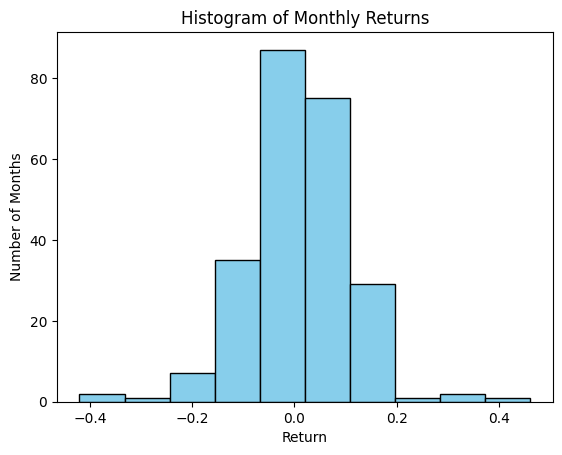

In [ ]:
import matplotlib.pyplot as plt

plt.hist(returns, bins=10, edgecolor='black', color='skyblue')
plt.title("Histogram of Monthly Returns")
plt.xlabel("Return")
plt.ylabel("Number of Months")
plt.show()

#Step 7: Visualize the Cumulative Distribution Function (CDF)

A CDF shows the probability that your return is less than or equal to a certain value.

It helps you see the spread cumulatively:

Steeper slope = data more tightly clustered.

Flatter slope = more spread out.

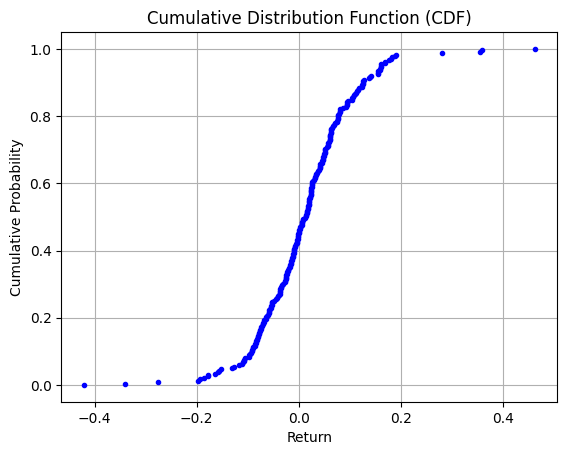

In [ ]:
# Sort the returns
sorted_returns = np.sort(returns)

# Calculate percentiles
p = 1. * np.arange(len(returns)) / (len(returns) - 1)

plt.plot(sorted_returns, p, marker='.', linestyle='none', color='blue')
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Return")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()


Rule of Thumb Check
After your visualizations:

Does your stock’s histogram and CDF support the idea that about 2/3 of returns lie within 1 SD and 95% within 2 SDs?

If not, your stock’s returns might be skewed or have fat tails — which is an important insight about risk!

Wrap-Up
You now have:

Hand + Python calculations for mean, variance, and standard deviation.

A clear understanding of how spread shows risk.

Visual tools to see if your data matches the “normal distribution” rule of thumb.